In [1]:
import pandas as pd       #data processing
import numpy as np        #linear algebra

import scipy
from scipy import stats
from geopy.distance import great_circle
from statsmodels.formula.api import ols

#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [2]:
data=pd.read_parquet("green_tripdata_2022-01.parquet")

data.shape #ReturnColumAndRowsNumber
data.columns #ReturnAttributes
data.dtypes #ReturnAttributeTypesOfColums
data.head() #ReturnFirstFewRows
data.isnull().sum() #ReturnsCountOfNullValuesOfAttributes
data.nunique() #ReturnsCountOfUniqueValuesOfAttributes
data.describe() #ReturnsStatisticsForNumericalAttributes

In [3]:
data.shape

(62495, 20)

In [4]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [5]:
data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [6]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [66]:
data.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        6295
RatecodeID                6295
PULocationID                 0
DOLocationID                 0
passenger_count           6295
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                62495
improvement_surcharge        0
total_amount                 0
payment_type              6295
trip_type                 6295
congestion_surcharge      6295
pickup_day                   0
dropoff_day                  0
pickup_day_no                0
dropoff_day_no               0
pickup_hour                  0
dropoff_hour                 0
pickup_month                 0
dropoff_month                0
pickup_timeofday             0
dropoff_timeofday            0
trip_duration                0
dtype: int64

In [8]:
data.nunique()

VendorID                     2
lpep_pickup_datetime     60635
lpep_dropoff_datetime    60610
store_and_fwd_flag           2
RatecodeID                   5
PULocationID               231
DOLocationID               240
passenger_count              9
trip_distance             1961
fare_amount               2678
extra                       10
mta_tax                      3
tip_amount                1301
tolls_amount                29
ehail_fee                    0
improvement_surcharge        3
total_amount              4026
payment_type                 5
trip_type                    2
congestion_surcharge         3
dtype: int64

In [9]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62495.000000,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,56200.000000,56200.000000,56200.000000
mean,1.849508,1.198719,97.615041,135.969902,1.258399,77.758632,13.914000,0.34756,0.426322,1.666540,0.208182,0.297312,17.490532,1.403594,1.040925,0.706628
std,0.357556,0.862313,62.987311,77.590956,0.877743,2909.354163,12.088819,0.65781,0.181381,2.484928,1.257659,0.037201,13.623416,0.516316,0.198119,1.201632
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.080000,7.000000,0.00000,0.500000,0.000000,0.000000,0.300000,9.360000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,137.000000,1.000000,1.900000,10.500000,0.00000,0.500000,1.000000,0.000000,0.300000,13.860000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,130.000000,215.000000,1.000000,3.500000,17.000000,0.50000,0.500000,2.610000,0.000000,0.300000,21.050000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,8.000000,224481.380000,604.500000,4.50000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000


In [10]:
data['pickup_day']=data['lpep_pickup_datetime'].dt.day_name()
data['dropoff_day']=data['lpep_dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['lpep_pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['lpep_dropoff_datetime'].dt.weekday
data['pickup_hour']=data['lpep_pickup_datetime'].dt.hour
data['dropoff_hour']=data['lpep_dropoff_datetime'].dt.hour
data['pickup_month']=data['lpep_pickup_datetime'].dt.month
data['dropoff_month']=data['lpep_dropoff_datetime'].dt.month

In [11]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [12]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [13]:
data.tip_amount.quantile(.50)

1.0

In [14]:
data.passenger_count.std()

0.8777428419071637

In [15]:
np.std(data.passenger_count)

0.8777350327724084

In [16]:
np.std(data.passenger_count, ddof=1)

0.8777428419071637

<Axes: xlabel='trip_distance', ylabel='Count'>

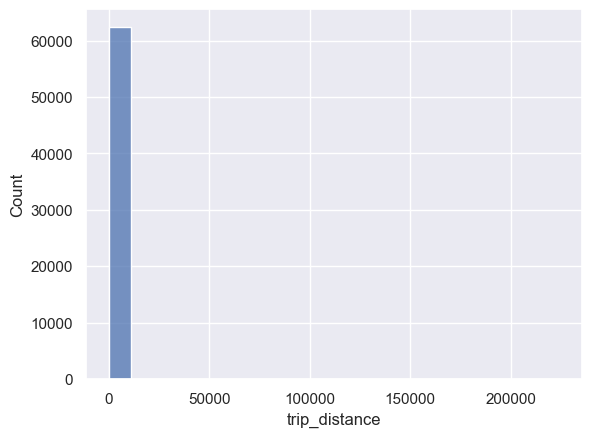

In [17]:
sns.histplot(data['trip_distance'],kde=False,bins=20)

<Axes: >

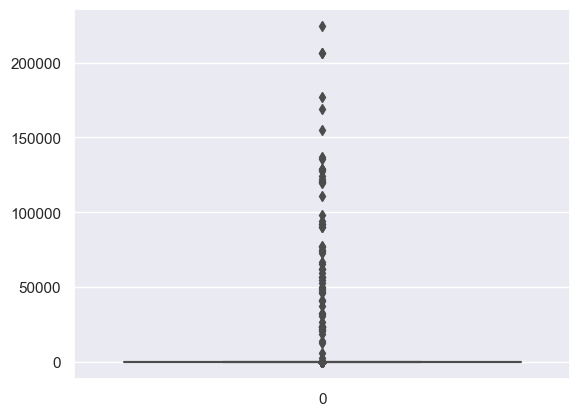

In [18]:
sns.boxplot(data['trip_distance'])

In [19]:
data.trip_distance.skew()

48.430833422061184

In [20]:
data.trip_distance.kurtosis()

2688.339202838068

In [21]:
data.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
VendorID,1.000000,0.073671,-0.011393,-0.001138,0.069255,0.010938,-0.053590,-0.344293,-0.151725,0.073345,...,-0.038996,0.014169,0.073753,0.013325,0.036799,0.036811,0.036935,0.028808,0.002916,0.003690
RatecodeID,0.073671,1.000000,0.124651,0.035196,-0.008858,0.019107,0.213469,-0.124680,-0.839009,0.016002,...,0.174864,0.022767,0.907914,-0.109593,0.045337,0.045125,-0.024534,-0.035042,-0.001684,-0.000727
PULocationID,-0.011393,0.124651,1.000000,0.108056,0.015928,-0.000777,0.130961,-0.023334,-0.142562,0.015730,...,0.114439,0.043526,0.116644,-0.071031,-0.000578,-0.000502,0.005416,0.002957,-0.001168,0.004317
DOLocationID,-0.001138,0.035196,0.108056,1.000000,0.004410,0.001713,0.083504,0.113587,-0.018115,0.117416,...,0.131835,-0.096388,0.032353,0.412732,-0.001692,-0.001638,-0.003463,-0.000582,-0.002081,-0.002725
passenger_count,0.069255,-0.008858,0.015928,0.004410,1.000000,-0.001050,-0.002820,0.003638,0.007643,0.008187,...,-0.000527,0.018729,-0.013028,0.005168,-0.006147,-0.006873,0.018863,0.016529,0.020047,0.010818
trip_distance,0.010938,0.019107,-0.000777,0.001713,-0.001050,1.000000,0.021662,-0.013575,-0.060681,0.025320,...,0.023670,-0.003210,-0.000960,0.008883,0.005148,0.005351,-0.010015,-0.008396,-0.000176,-0.000223
fare_amount,-0.053590,0.213469,0.130961,0.083504,-0.002820,0.021662,1.000000,-0.043707,-0.231283,0.244714,...,0.969947,-0.049670,0.169162,0.108294,0.015181,0.016271,-0.045383,-0.030099,-0.000715,-0.000600
extra,-0.344293,-0.124680,-0.023334,0.113587,0.003638,-0.013575,-0.043707,1.000000,0.221867,0.061103,...,0.012234,-0.081387,-0.116639,0.280713,-0.100046,-0.099624,0.244580,0.241800,0.001606,0.001461
mta_tax,-0.151725,-0.839009,-0.142562,-0.018115,0.007643,-0.060681,-0.231283,0.221867,1.000000,-0.133829,...,-0.213021,-0.109141,-0.805585,0.113543,-0.052390,-0.051944,0.027484,0.031640,0.002814,0.000799
tip_amount,0.073345,0.016002,0.015730,0.117416,0.008187,0.025320,0.244714,0.061103,-0.133829,1.000000,...,0.439155,-0.507081,0.020901,0.266530,0.022737,0.023185,-0.002930,0.006885,-0.001710,-0.000256


In [22]:
data.tip_amount.corr(data.fare_amount)

0.24471389541042518

In [23]:
corr_data = pd.DataFrame(columns=['r','p'])

for col in data:
        print(col)
        if pd.api.types.is_numeric_dtype(data[col]):
            r, p = stats.pearsonr(data.trip_distance,data[col])
            corr_data.loc[col] = [r,p]
corr_data

VendorID
lpep_pickup_datetime
lpep_dropoff_datetime
store_and_fwd_flag
RatecodeID


ValueError: array must not contain infs or NaNs

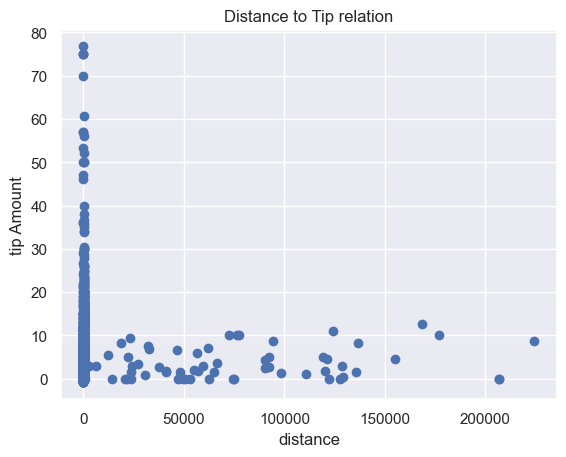

In [24]:
plt.scatter(data.trip_distance,data.tip_amount)
plt.title('Distance to Tip relation')
plt.xlabel('distance')
plt.ylabel('tip Amount')
plt.show()

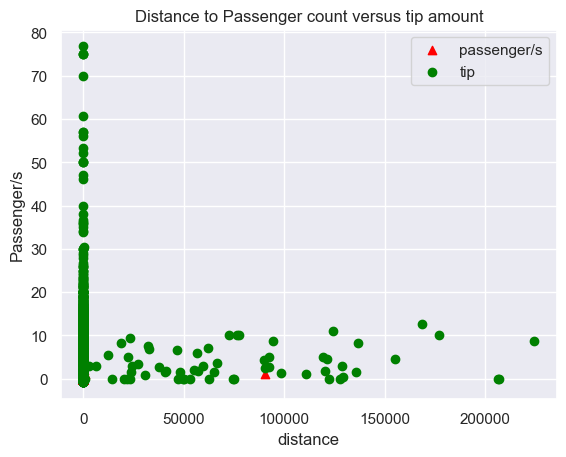

In [25]:
plt.scatter(data.trip_distance,data.passenger_count, label='passenger/s', color='red', marker='^')
plt.scatter(data.trip_distance, data.tip_amount, label='tip', color = 'green', marker='o')
plt.title('Distance to Passenger count versus tip amount')
plt.xlabel('distance')
plt.ylabel('Passenger/s')
plt.legend()
plt.show()

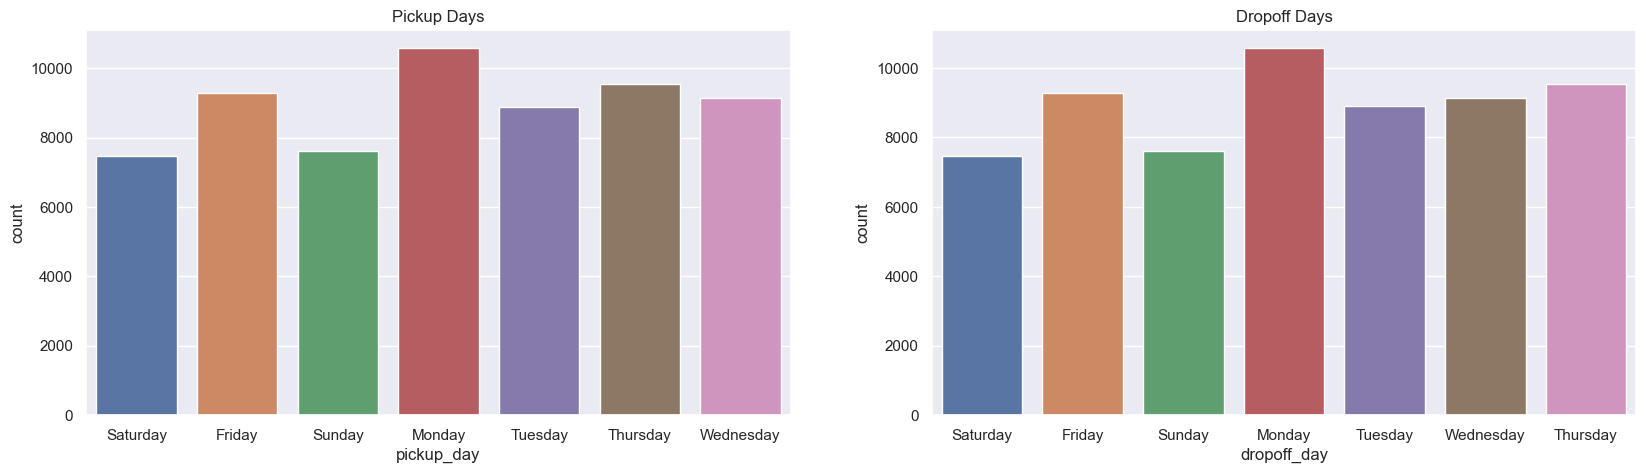

In [28]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

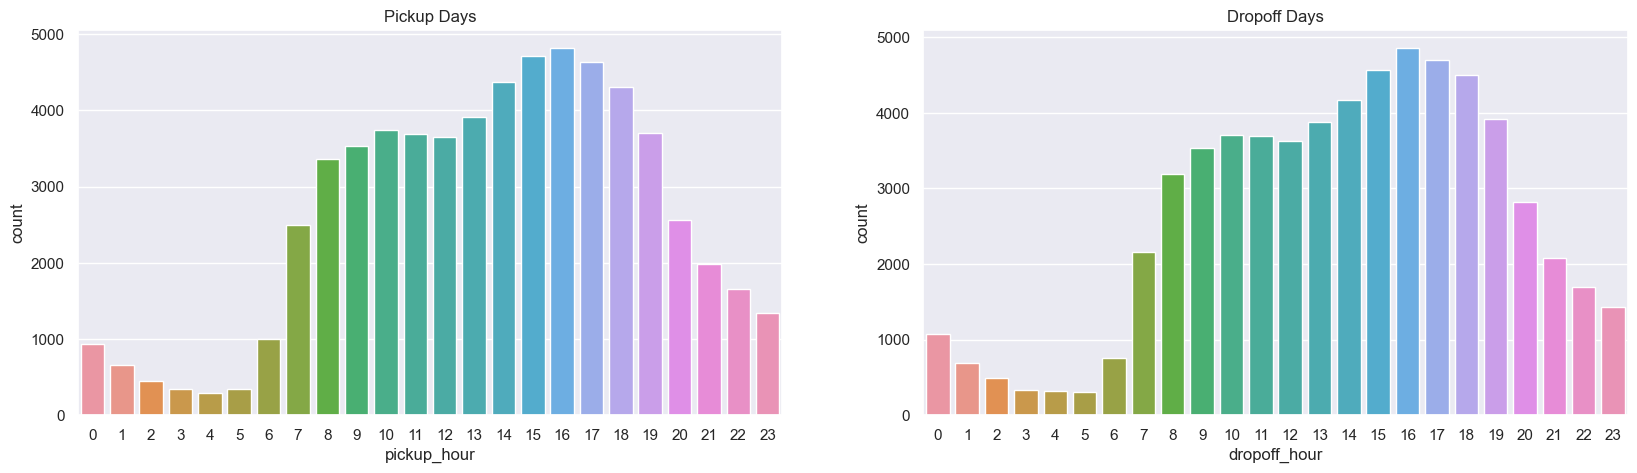

In [29]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

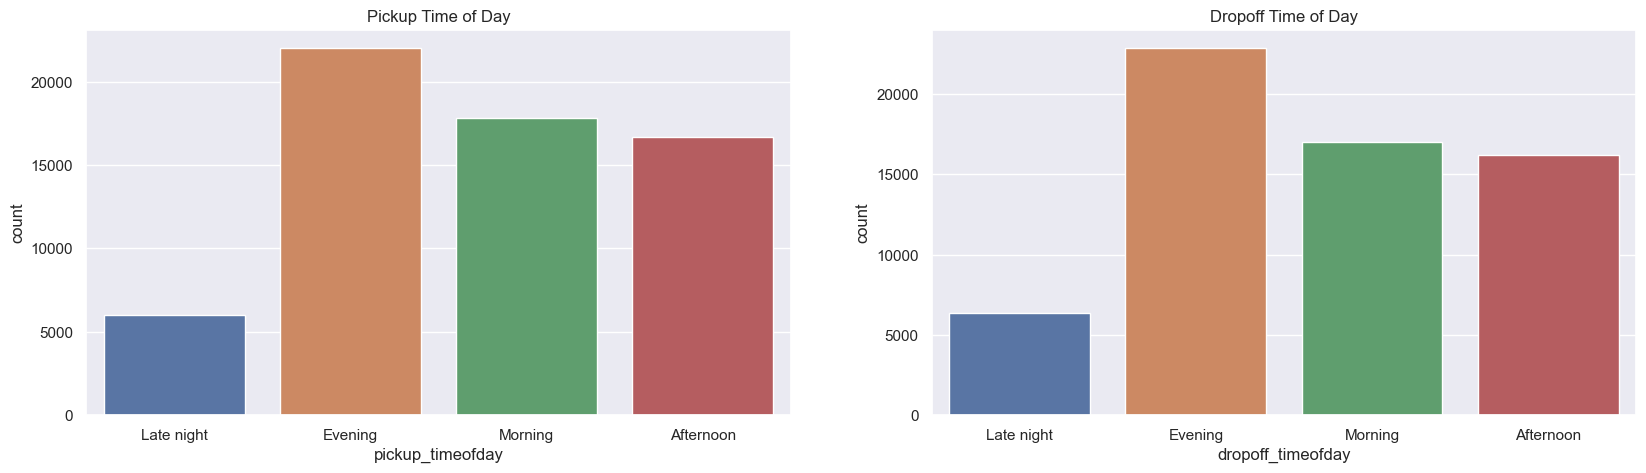

In [30]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

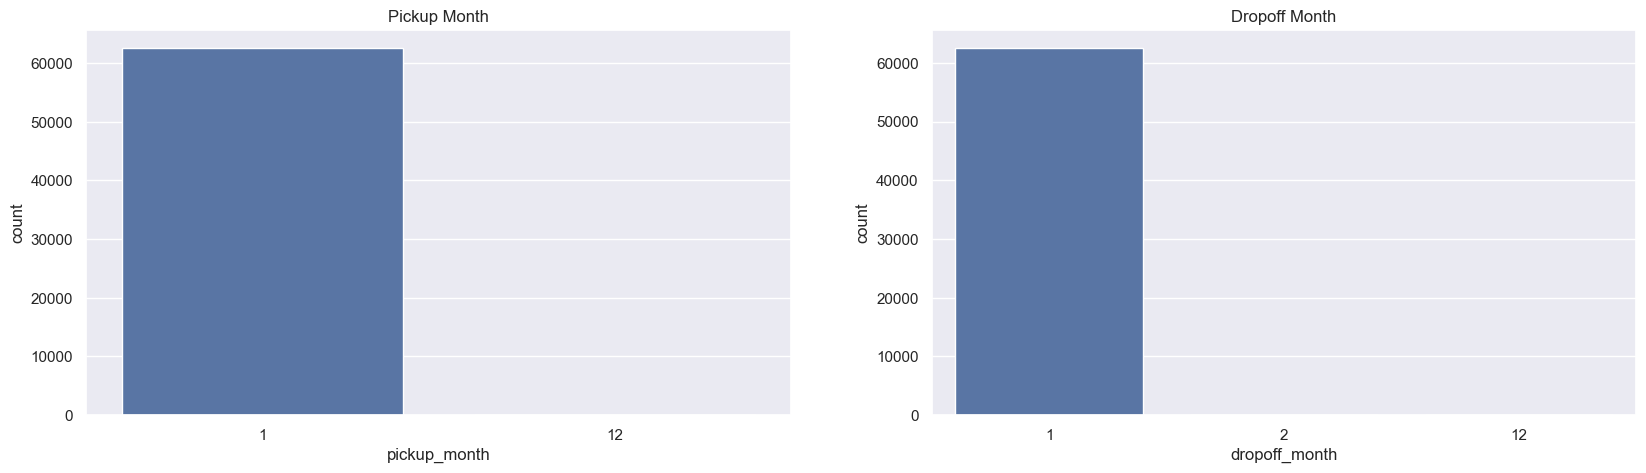

In [31]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))

ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

In [34]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_day', 'dropoff_day', 'pickup_day_no', 'dropoff_day_no',
       'pickup_hour', 'dropoff_hour', 'pickup_month', 'dropoff_month',
       'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')

In [49]:
def cal_duration(lpep_pickup_datetime,lpep_dropoff_datetime):

    start_time = (lpep_pickup_datetime)
    dropoff_time = (lpep_dropoff_datetime)
    duration = start_time - dropoff_time
    duration_in_s = duration.total_seconds()
    trip_duration_in_h = divmod(duration_in_s, 3600)[0]
    
    return trip_duration_in_h


In [50]:
data['trip_duration'] = data.apply(lambda x: cal_duration(x['lpep_pickup_datetime'],x['lpep_dropoff_datetime']), axis=1)

<Axes: xlabel='trip_duration', ylabel='Count'>

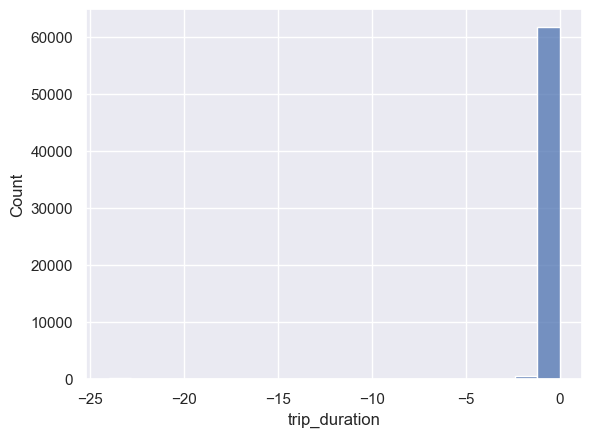

In [53]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

<Axes: xlabel='VendorID', ylabel='trip_duration'>

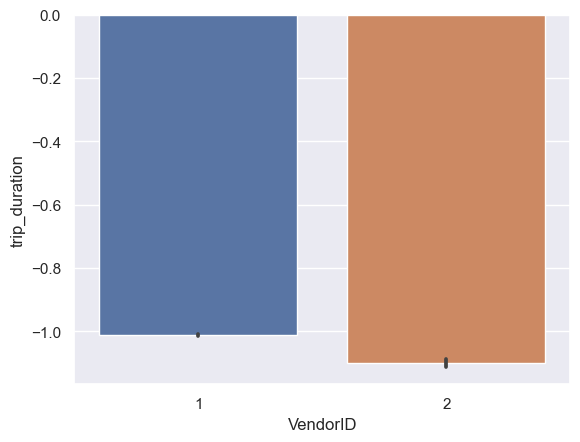

In [64]:
sns.barplot(y='trip_duration',x='VendorID',data=data,estimator=np.mean)

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

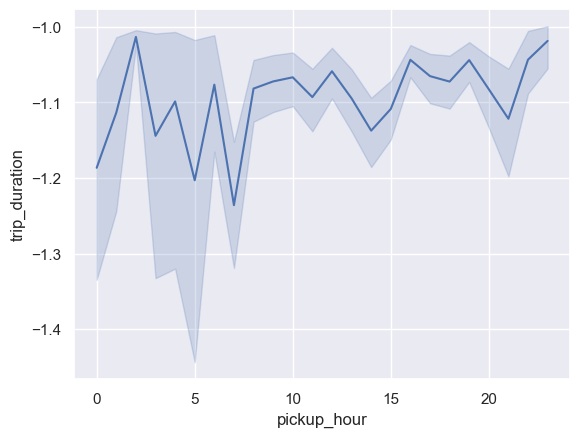

In [65]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)


<Axes: xlabel='pickup_timeofday', ylabel='trip_duration'>

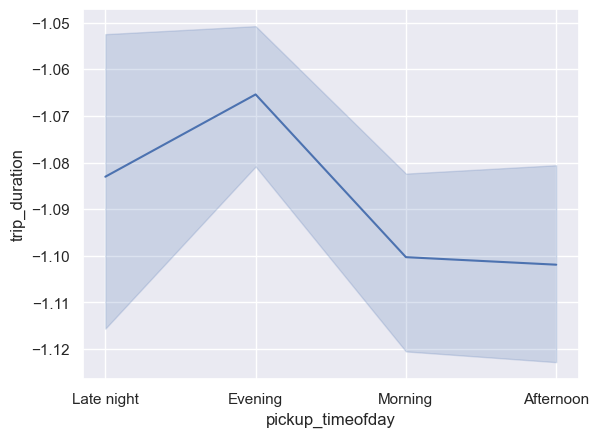

In [58]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

<Axes: xlabel='pickup_day_no', ylabel='trip_duration'>

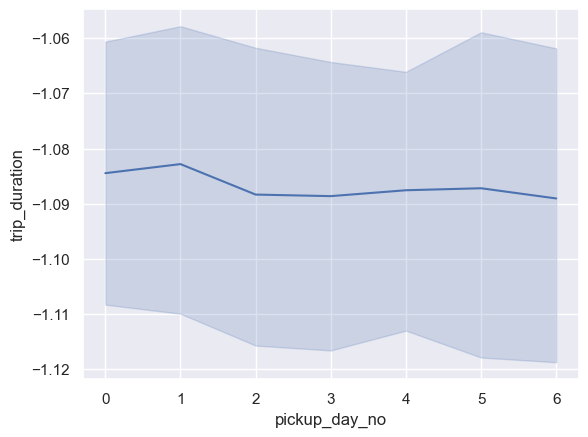

In [59]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

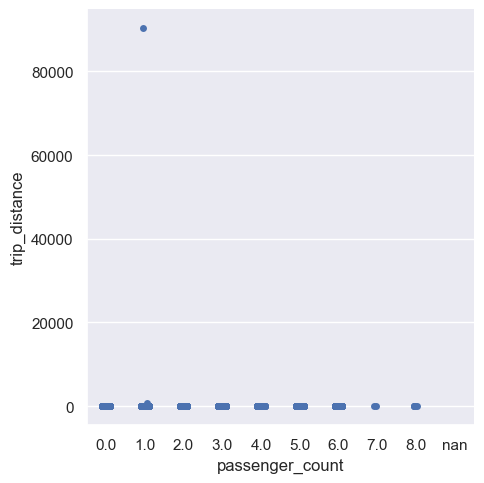

In [61]:
sns.catplot(y='trip_distance',x='passenger_count',data=data,kind="strip")

<Axes: xlabel='pickup_day_no', ylabel='trip_distance'>

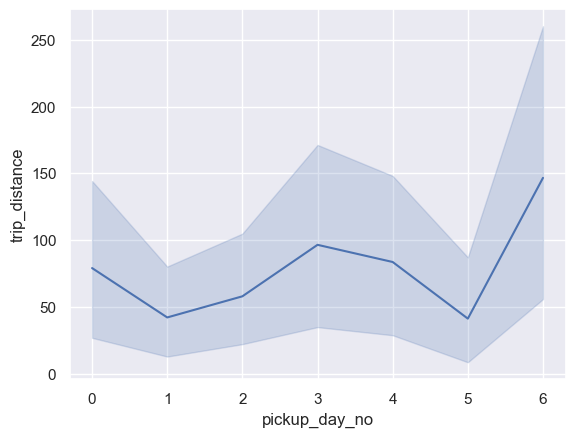

In [62]:
sns.lineplot(x='pickup_day_no',y='trip_distance',data=data)

<Axes: xlabel='VendorID', ylabel='passenger_count'>

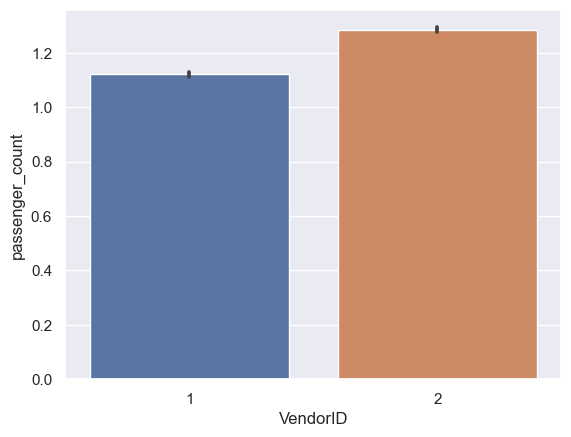

In [63]:
sns.barplot(y='passenger_count',x='VendorID',data=data)


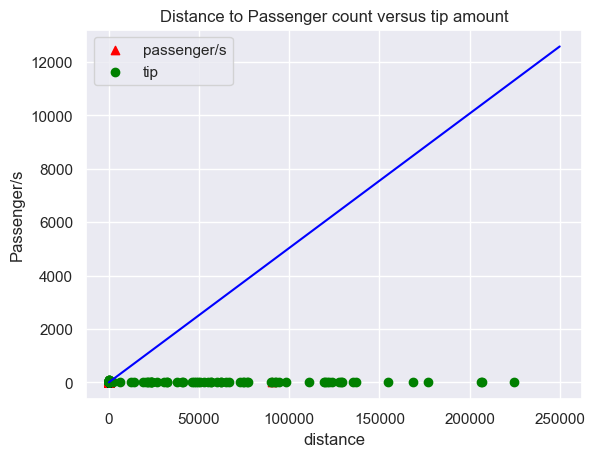

In [26]:
m, b, r, p, err = stats.linregress(data.fare_amount, data.tip_amount)
x = range(10,250000)
y = m * x + b
plt.plot(x,y, color='blue')
plt.scatter(data.trip_distance,data.passenger_count, label='passenger/s', color='red', marker='^')
plt.scatter(data.trip_distance, data.tip_amount, label='tip', color = 'green', marker='o')
plt.title('Distance to Passenger count versus tip amount')
plt.xlabel('distance')
plt.ylabel('Passenger/s')
plt.legend()
plt.show()

In [27]:
model = ols(formula='trip_distance~passenger_count', data=data).fit()

white_test= het_white(model.resid, model.model.exog)
breushpagan_test= het_breushpagan(model.resid, model.model.exog)

output_data= pd.DataFrame(columns=['LM stat','LM p','F stat','F stat p'])
output_data.loc['White'] = white_test
output_data.loc['Breush-Pagan'] = breushpagan_test

NameError: name 'het_white' is not defined